In [1]:
import pandas as pd
from marcap import marcap_data

In [2]:
Ticker = pd.read_csv('./data/MAN_Ticker.csv', dtype={'코드':str}, encoding='euc-kr')
Ticker = Ticker.iloc[:, 1:]
Ticker.head(10)

,코드,종목명
0,005930,삼성전자
1,000660,SK하이닉스
2,207940,삼성바이오로직스
3,035420,NAVER
4,051910,LG화학
5,005380,현대차
6,068270,셀트리온
7,006400,삼성SDI
8,012330,현대모비스
9,028260,삼성물산


In [3]:
len(Ticker)

2038

Ticker는 제조업으로 분류되는 2038 종목의 종목코드와 종목명을 저장하고 있습니다.

In [4]:
df_fs = pd.read_csv('./data/Man_2003Y.csv', dtype={'코드':str}, encoding='euc-kr')
df_fs = df_fs.iloc[:, 1:]
df_fs.set_index('Date', inplace=True)
df_fs

,구분,코드,매출,매출총이익,영업이익,금융수익,금융원가,이자비용,기타수익,기타비용,...,투자활동현금유출,유형자산의증가,기타투자활동현금흐름,재무활동현금흐름,재무활동현금유입,재무활동현금유출,기타재무활동현금흐름,현금및현금성자산증가,기초현금및현금성자산,기말현금및현금성자산
Date,,,,,,,,,,,,,,,,,,,,,
2003,Y,005930,648175,225650,62962,3644,6619,2151,16913,15073,...,154529,77008,0,-45724,156969,193591,-9102,17671,23586,41257
2003,Y,000660,48031,9124,432,299,3887,3014,2681,20657,...,9650,8189,0,-4396,1101,5489,-9,3211,2446,5657
2003,Y,207940,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2003,Y,035420,1663,1058,654,25,0,0,6,7,...,918,156,0,-9,9,0,-19,-220,362,142
2003,Y,051910,68974,14229,6787,147,1240,972,636,1048,...,12199,6089,0,3553,14600,11047,0,954,2388,3342
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2003,Y,083470,59,10,2,0,1,1,1,2,...,30,19,0,35,39,4,0,2,1,3
2003,Y,030270,330,34,18,1,8,7,8,5,...,41,23,0,-12,210,218,-4,-1,6,5
2003,Y,033600,321,74,19,9,5,5,1,1,...,48,38,0,10,43,18,-15,2,86,88


In [5]:
mf_count = 20 #마법공식으로 몇 종목을 선택할 지 결정하는 변수
seed_money = 20000000 #시뮬레이션을 위한 초기 자금
df_marcap = marcap_data('2004-03-31')
price_marcap = df_marcap.loc[:,['Code', 'Marcap']]
price_marcap['Marcap'] = price_marcap['Marcap'] / 100000000
price_marcap

,Code,Marcap
Date,,
2004-03-31,005930,853181.929600
2004-03-31,017670,176483.545095
2004-03-31,060000,156416.288940
2004-03-31,005490,144125.171100
2004-03-31,015760,129110.837460
...,...,...
2004-03-31,036720,0.588221
2004-03-31,035960,0.563044
2004-03-31,055000,0.550000


price_marcap은 2003년 사업보고서 마감일인 2004년 3월 31일 기준으로 종목의 시가총액을 나타냅니다

In [7]:
df_target = df_fs.loc['2003'][['코드', '지배주주순이익', '법인세비용', '이자비용', '부채총계', '현금및현금성자산', '유동자산', '유동부채', '비유동자산', '감가상각비']]
df_target = pd.merge(df_target, price_marcap, left_on='코드', right_on='Code')
df_target = df_target.drop(columns=['Code'])
df_target['EXCASH1'] = df_target['유동부채'] - df_target['유동자산'] + df_target['현금및현금성자산']
df_target.loc[df_target['EXCASH1'] < 0, 'EXCASH1'] = 0
df_target['EBIT'] = df_target['지배주주순이익'] + df_target['법인세비용'] + df_target['이자비용']
df_target['IC'] = df_target['유동자산'] - df_target['유동부채'] + df_target['비유동자산'] - df_target['감가상각비']
df_target['EV'] = df_target['Marcap'] + df_target['부채총계'] - df_target['현금및현금성자산'] + df_target['EXCASH1']
df_target['EY'] = df_target['EBIT'] / df_target['EV']
df_target['ROC'] = df_target['EBIT'] / df_target['IC']
df_target['RANK_EY'] = df_target['EY'].rank(ascending=False)
df_target['RANK_ROC'] = df_target['ROC'].rank(ascending=False)
df_target['RANK_TOT'] = df_target['RANK_EY'] + df_target['RANK_ROC']
df_target = pd.merge(df_target, Ticker, left_on='코드', right_on='코드')
df_last = df_target.sort_values(by=['RANK_TOT']).head(mf_count)
df_last = df_last.set_index('코드')
df_last

,지배주주순이익,법인세비용,이자비용,부채총계,현금및현금성자산,유동자산,유동부채,비유동자산,감가상각비,Marcap,EXCASH1,EBIT,IC,EV,EY,ROC,RANK_EY,RANK_ROC,RANK_TOT,종목명
코드,,,,,,,,,,,,,,,,,,,,
005110,45,0,40,0,10,49,0,0,20,46.797491,0,85,29,36.797491,2.309940,2.931034,1.0,2.0,3.0,한창
004770,151,64,7,236,66,299,224,274,20,81.100000,0,222,329,251.100000,0.884110,0.674772,2.0,3.0,5.0,써니전자
003570,1135,0,30,1977,353,1493,1036,2329,122,887.301646,0,1165,2664,2511.301646,0.463903,0.437312,5.0,13.0,18.0,S&T중공업
008730,754,289,37,1201,24,1664,1112,1503,83,1802.960000,0,1080,1972,2979.960000,0.362421,0.547667,13.0,6.0,19.0,율촌화학
001430,2018,0,740,2334,463,2756,981,6695,794,2982.624092,0,2758,7676,4853.624092,0.568235,0.359302,3.0,25.0,28.0,세아베스틸
003230,506,2,188,2068,220,737,800,1405,54,242.220978,283,696,1288,2373.220978,0.293272,0.540373,33.0,7.0,40.0,삼양식품
007720,267,0,4,841,209,922,643,483,0,124.060192,0,271,762,756.060192,0.358437,0.355643,14.0,26.0,40.0,대명코퍼레이션
018310,46,17,5,109,1,204,92,89,22,104.860000,0,68,179,212.860000,0.319459,0.379888,24.0,22.0,46.0,삼목에스폼
002410,316,133,33,876,65,1158,494,846,12,705.673149,0,482,1498,1516.673149,0.317801,0.321762,25.0,37.0,62.0,범양건영


df_last는 마법공식으로 계산하여 선정된 20종목의 재무제표와 RANK 점수를 포함합니다.

In [8]:
moneyperstock = seed_money / mf_count #종목별 투자액
cash = 0 # 초기 현금잔고
mf_list = df_last.index.tolist() # 선택된 종목의 코드를 리스트
final_marcap = marcap_data('2004-04-01', '2005-03-31')
final_marcap = final_marcap[final_marcap['Code'].isin(mf_list)] #선정됙 종목의 marcap 정보만 추출
df_yield = pd.DataFrame(columns=mf_list)    # 종목 코드를 column 이름으로 하는 dataframe 생성. 일자별 수익률 변화 체크
df_asset = pd.Series(index=mf_list, dtype=float)    # 종목별 보유수량 체크
balance = 0 #자산잔고
df_yield

,005110,004770,003570,008730,001430,003230,007720,018310,002410,005420,001540,064240,024800,033920,001940,004450,067170,018120,053290,060560


In [9]:
for stock in mf_list:
        tmp_df = final_marcap[final_marcap['Code'] == stock]    #주가 정보를 포함하는 df
        old_stocks = tmp_df.loc[tmp_df.index[0], 'Stocks']
        latest_stocks = tmp_df.loc[tmp_df.index[-1], 'Stocks']
        if old_stocks == latest_stocks:     #연간 주식수의 변화가 없으면 수정주가는 기존 주가를 사용
            tmp_df['Adj Close'] = tmp_df['Close']
            start_price = tmp_df.loc[tmp_df.index[0], 'Open']
            df_asset[stock] = moneyperstock * 0.99985 // start_price
            cash = cash + (moneyperstock - df_asset[stock] * start_price * 1.00015)
            tmp_df['Yield'] = tmp_df['Close'] * df_asset[stock]
            df_yield[stock] = tmp_df['Yield']
            balance = balance + tmp_df.loc[tmp_df.index[-1], 'Close'] * df_asset[stock] * 0.99685
        else:           #연간 주식수 변화가 있으면 유상증자와 무상증자에 따라 수정주가 사용이 바뀜
            change_count = 0
            for k in range(len(tmp_df) - 1):
                if tmp_df.loc[tmp_df.index[k], 'Stocks'] != tmp_df.loc[tmp_df.index[k+1], 'Stocks']:    #주식수의 변동이 있으면
                    before_mar = tmp_df.loc[tmp_df.index[k], 'Marcap'] * (1 + tmp_df.loc[tmp_df.index[k+1], 'ChagesRatio'] / 100)
                    after_mar = tmp_df.loc[tmp_df.index[k+1], 'Marcap']
                    if change_count == 0:
                        if (after_mar * 0.99 < before_mar) & (before_mar < after_mar * 1.01):   #무상증자는 수정주가 계산이 필요함
                            start_price = tmp_df.loc[tmp_df.index[0], 'Open'] * tmp_df.loc[tmp_df.index[0], 'Stocks'] / tmp_df.loc[tmp_df.index[k+1], 'Stocks']
                            tmp_df['Adj Close'] = tmp_df['Close'] * (tmp_df.loc[tmp_df.index[k], 'Stocks'] / tmp_df.loc[tmp_df.index[k+1], 'Stocks'])  #수정종가
                        else:   #유상증자는 수정주가 계산 필요 없음
                            tmp_df['Adj Close'] = tmp_df['Close']
                            start_price = tmp_df.loc[tmp_df.index[0], 'Open']
                        change_count += 1
                    else:   # 주식수 변동이 여러번 있으면 수정주가가 기존 종가를 계속 사용할 수 없으므로 기존 종가 대신 기존 수정주가를 이용해 다시 계산
                        if (after_mar * 0.99 < before_mar) & (before_mar < after_mar * 1.01):
                            start_price = start_price * tmp_df.loc[tmp_df.index[k], 'Stocks'] / tmp_df.loc[tmp_df.index[k+1], 'Stocks']
                            tmp_df['Adj Close'] = tmp_df['Adj Close'] * (tmp_df.loc[tmp_df.index[k], 'Stocks'] / tmp_df.loc[tmp_df.index[k+1], 'Stocks'])  #수정종가
                        else:
                            start_price = start_price
                            tmp_df['Adj Close'] = tmp_df['Adj Close']
                        change_count += 1  
            df_asset[stock] = moneyperstock * 0.99985 // start_price
            cash = cash + (moneyperstock - df_asset[stock] * start_price * 1.00015)
            tmp_df['Yield'] = tmp_df['Adj Close'] * df_asset[stock]
            df_yield[stock] = tmp_df['Yield']
            balance = balance + tmp_df.loc[tmp_df.index[-1], 'Adj Close'] * df_asset[stock] * 0.99685
            #종목별로 수정주가를 계산하고 첫날을 기준으로 누적수익률을 체크
df_yield = df_yield.fillna(method='ffill')
df_yield['sum'] = df_yield.sum(axis=1)
df_yield['sum'] = df_yield['sum'] + cash

C:\Users\pufks\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\pufks\Anaconda3\lib\site-packages\ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\pufks\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

In [10]:
seed_money = balance + cash
seed_money

102020022.97875643

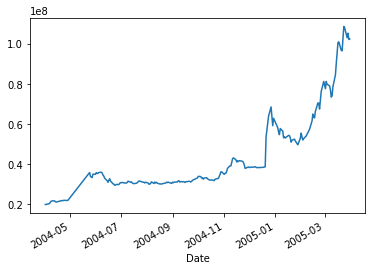

In [11]:
df_yield['sum'].plot()

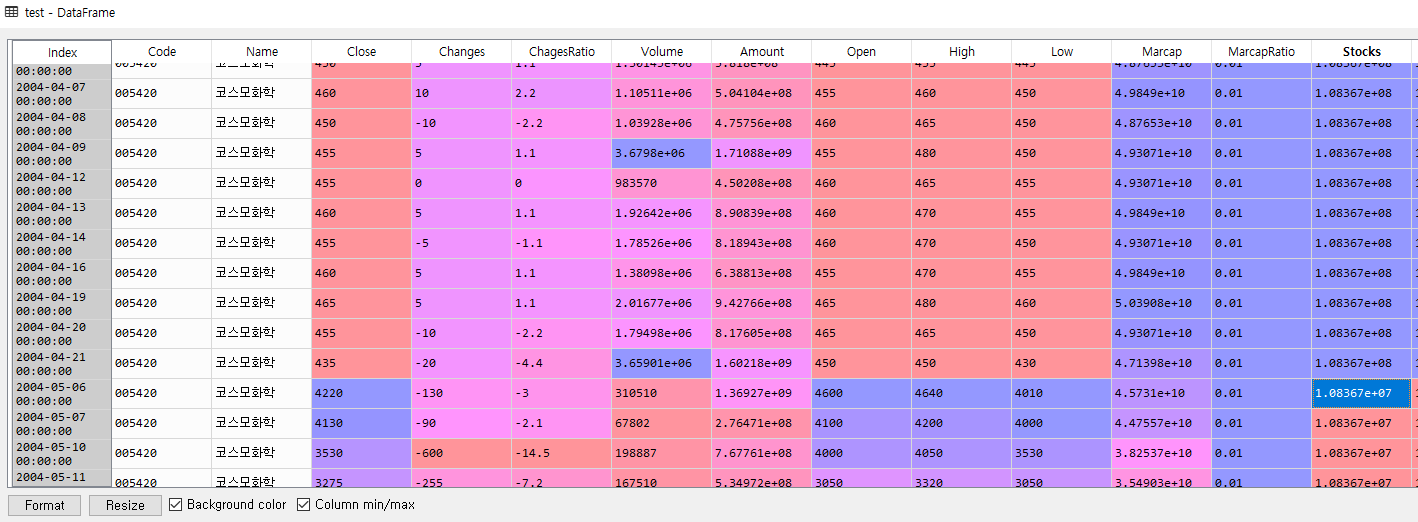

In [12]:
from IPython.display import Image
Image('./img/fs_error2_200327.png')

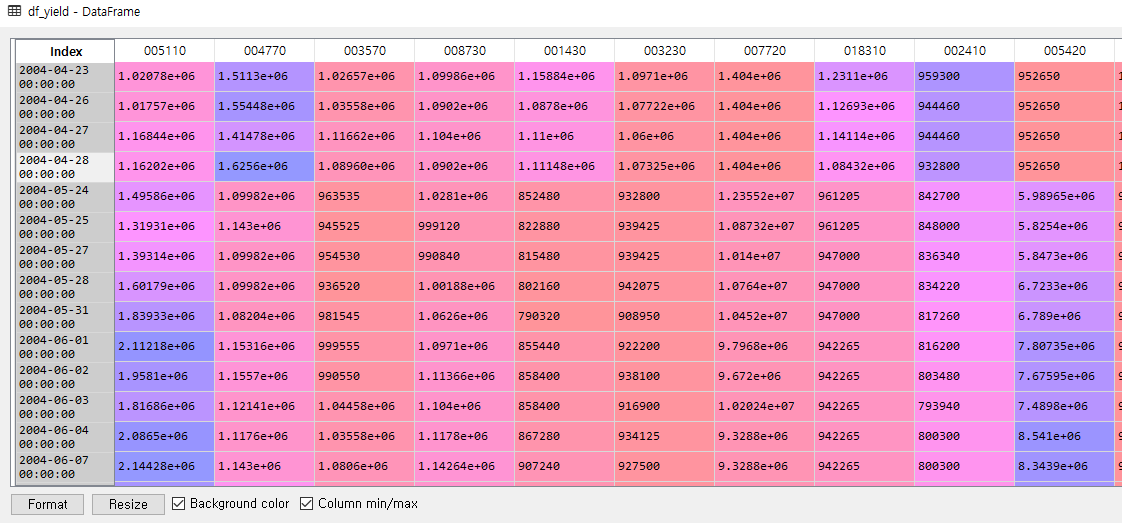

In [13]:
Image('./img/fs_error_200327.png')

수익률이 급등한 원인을 찾아보았더니 '005420' 종목의 평가액이 4/28에서 5/24로 넘어갈 때 6배 급증했음을 확인했습니다. 개별 종목의 주식수를 체크해보니 주식수가 1/10으로 줄면서 주가가 10배 증가했는데 이걸 제대로 체크하지 못했습니다. 게다가 df_yield를 확인해보니 4/28~5/24일까지 한달정도 날짜가 비어있음을 확인했습니다.